# Introduction and flat files

Datasets

    Chinook (SQLite)
    LIGO (HDF5)
    Battledeath (XLSX)
    Extent of infectious diseases (DTA)
    Gene expressions (MATLAB)
    MNIST
    Sales (SAS7BDAT)
    Seaslugs
    Titanic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Importing entire text files

In this exercise, you'll be working with the file moby_dick.txt. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

In [12]:
# Open a file: file
file = open('moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)


FileNotFoundError: [Errno 2] No such file or directory: 'moby_dick.txt'

## Importing text files line by line

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the readline() method, which allows you to do this. When a file called file is open, you can print out the first line by executing file.readline(). If you execute the same command again, the second line will print, and so on.

In the introductory video, Hugo also introduced the concept of a context manager. He showed that you can bind a variable file by using a context manager construct:

with open('huck_finn.txt') as file:

While still within this construct, the variable file will be bound to open('huck_finn.txt'); thus, to print the file to the shell, all the code you need to execute is:

with open('huck_finn.txt') as file:
    print(file.readline())

You'll now use these tools to print the first few lines of moby_dick.txt!

In [2]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

FileNotFoundError: [Errno 2] No such file or directory: 'moby_dick.txt'

## Using NumPy to import flat files

In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function loadtxt() and see just how easy it can be:

    The first argument will be the filename.
    The second will be the delimiter which, in this case, is a comma.

You can find more information about the MNIST dataset here on the webpage of Yann LeCun, who is currently Director of AI Research at Facebook and Founding Director of the NYU Center for Data Science, among many other things.

<class 'numpy.ndarray'>


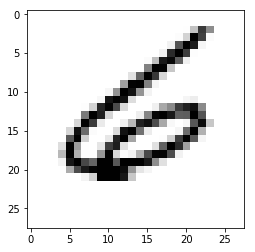

In [15]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


## Customizing your NumPy import

What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that np.loadtxt() takes that you'll find useful: delimiter changes the delimiter that loadtxt() is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; skiprows allows you to specify how many rows (not indices) you wish to skip; usecols takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, digits_header.txt,

    has a header
    is tab-delimited.


In [16]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

# Print data
print(data)


OSError: digits_header.txt not found.

## Importing different datatypes

The file seaslug.txt

    has a text header, consisting of strings
    is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. Read more here.

Due to the header, if you tried to import it as-is using np.loadtxt(), Python would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument.

['Time' 'Percent']
[0.    0.357]


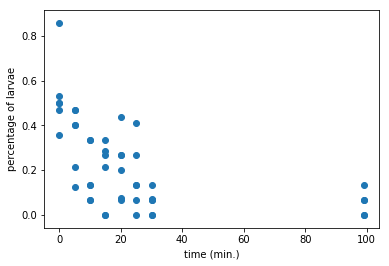

In [17]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


## Working with mixed datatypes (1)

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() as follows:

data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].

Print the entire column with name Survived to the shell. What are the last 4 values of this column?

## Working with mixed datatypes (2)

You have just used np.genfromtxt() to import data containing mixed datatypes. There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

In [19]:
# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])


[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


## Using pandas to import flat files as DataFrames (1)

In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the DataFrame object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions read_csv() and read_table().

In [20]:
# Import pandas
import pandas as pd

# Assign the filename: file
file = 'titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


## Using pandas to import flat files as DataFrames (2)

In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

In [21]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


## Customizing your pandas import

The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which

    contains comments after the character '#'
    is tab-delimited.


In [22]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


FileNotFoundError: File b'titanic_corrupt.txt' does not exist

# Importing data from other file types

## Not so flat any more

In Chapter 1, you learned how to use the IPython magic command ! ls to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

import os
wd = os.getcwd()
os.listdir(wd)

Run this code in the IPython shell and answer the following questions. Ignore the files that begin with ..

Check out the contents of your current directory and answer the following questions: (1) which file is in your directory and NOT an example of a flat file; (2) why is it not a flat file?

## Loading a pickled file

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

In [23]:
# Import pickle package
import pickle

# Open pickle file and load data
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print data
print(d)

# Print datatype
print(type(d))

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

## Listing sheets in Excel files

Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute spreadsheet.sheet_names.

Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx', modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [24]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)


['2002', '2004']


## Importing sheets from Excel files

In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

The spreadsheet 'battledeath.xlsx' is already loaded as xl.

In [25]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


## Customizing your spreadsheet import

Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet 'battledeath.xlsx' is already loaded as xl.

As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and parse_cols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

In [26]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1, parse_cols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

## Importing SAS files

In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas. The file 'sales.sas7bdat' is already in your working directory and both pandas and matplotlib.pyplot have already been imported as follows:

import pandas as pd
import matplotlib.pyplot as plt

The data are adapted from the website of the undergraduate text book Principles of Econometrics by Hill, Griffiths and Lim.

In [27]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histograms of a DataFrame feature (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

ModuleNotFoundError: No module named 'sas7bdat'

## Importing Stata files

Here, you'll gain expertise in importing Stata files as DataFrames using the pd.read_stata() function from pandas. The last exercise's file, 'disarea.dta', is still in your working directory.

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

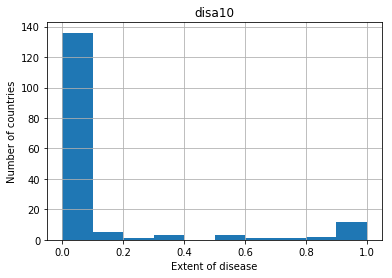

In [28]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


## Using h5py to import HDF5 files

The file 'LIGO_data.hdf5' is already in your working directory. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

You can find the LIGO data plus loads of documentation and tutorials here. There is also a great tutorial on Signal Processing with the data here.

In [29]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


OSError: Unable to open file (unable to open file: name = 'LIGO_data.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Extracting data from your HDF5 file

In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group 'strain'.

In [30]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_Samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


KeyError: 'strain'

## Loading .mat files

In this exercise, you'll figure out how to load a MATLAB file using scipy.io.loadmat() and you'll discover what Python datatype it yields.

The file 'albeck_gene_expression.mat' is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis. You can find the data and some great documentation here.

In [31]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


FileNotFoundError: [Errno 2] No such file or directory: 'albeck_gene_expression.mat'

## The structure of .mat in Python

Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

The file 'albeck_gene_expression.mat' is already loaded into the variable mat. The following libraries have already been imported as follows:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

Once again, this file contains gene expression data from the Albeck Lab at UCDavis. You can find the data and some great documentation here.

In [32]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


NameError: name 'mat' is not defined

# Working with relational databases in Python

## Creating a database engine

Here, you're going to fire up your very first SQL engine. You'll create an engine to connect to the SQLite database 'Chinook.sqlite', which is in your working directory. Remember that to create an engine to connect to 'Northwind.sqlite', Hugo executed the command

engine = create_engine('sqlite:///Northwind.sqlite')

Here, 'sqlite:///Northwind.sqlite' is called the connection string to the SQLite database Northwind.sqlite. A little bit of background on the Chinook database: the Chinook database contains information about a semi-fictional digital media store in which media data is real and customer, employee and sales data has been manually created.

Why the name Chinook, you ask? According to their website,

    The name of this sample database was based on the Northwind database. Chinooks are winds in the interior West of North America, where the Canadian Prairies and Great Plains meet various mountain ranges. Chinooks are most prevalent over southern Alberta in Canada. Chinook is a good name choice for a database that intends to be an alternative to Northwind.


In [33]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

## What are the tables in the database?

In this exercise, you'll once again create an engine to connect to 'Chinook.sqlite'. Before you can get any data out of the database, however, you'll need to know what tables it contains!

To this end, you'll save the table names to a list using the method table_names() on the engine and then you will print the list.

In [34]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)


['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


## The Hello World of SQL Queries!

Now, it's time for liftoff! In this exercise, you'll perform the Hello World of SQL queries, SELECT, in order to retrieve all columns of the table Album in the Chinook database. Recall that the query SELECT * selects all columns.

In [35]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


## Customizing the Hello World of SQL Queries

Congratulations on executing your first SQL query! Now you're going to figure out how to customize your query in order to:

    Select specified columns from a table;
    Select a specified number of rows;
    Import column names from the database table.

Recall that Hugo performed a very similar query customization in the video:

engine = create_engine('sqlite:///Northwind.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()

Packages have already been imported as follows:

from sqlalchemy import create_engine
import pandas as pd

The engine has also already been created:

engine = create_engine('sqlite:///Chinook.sqlite')

The engine connection is already open with the statement

with engine.connect() as con:

All the code you need to complete is within this context.

In [36]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


## Filtering your database records using SQL's WHERE

You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

There are a couple more standard SQL query chops that will aid you in your journey to becoming an SQL ninja.

Let's say, for example that you wanted to get all records from the Customer table of the Chinook database for which the Country is 'Canada'. You can do this very easily in SQL using a SELECT statement followed by a WHERE clause as follows:

SELECT * FROM Customer WHERE Country = 'Canada'

In fact, you can filter any SELECT statement by any condition using a WHERE clause. This is called filtering your records.

In this interactive exercise, you'll select all records of the Employee table for which 'EmployeeId' is greater than or equal to 6.

Packages are already imported as follows:

import pandas as pd
from sqlalchemy import create_engine

Query away!

In [37]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


## Ordering your SQL records with ORDER BY

You can also order your SQL query results. For example, if you wanted to get all records from the Customer table of the Chinook database and order them in increasing order by the column SupportRepId, you could do so with the following query:

"SELECT * FROM Customer ORDER BY SupportRepId"

In fact, you can order any SELECT statement by any column.

In this interactive exercise, you'll select all records of the Employee table and order them in increasing order by the column BirthDate.

Packages are already imported as follows:

import pandas as pd
from sqlalchemy import create_engine

Get querying!

In [38]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())


   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

## Pandas and The Hello World of SQL Queries!

Here, you'll take advantage of the power of pandas to write the results of your SQL query to a DataFrame in one swift line of Python code!

You'll first import pandas and create the SQLite 'Chinook.sqlite' engine. Then you'll query the database to select all records from the Album table.

Recall that to select all records from the Orders table in the Northwind database, Hugo executed the following command:

df = pd.read_sql_query("SELECT * FROM Orders", engine)


In [39]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


## Pandas for more complex querying

Here, you'll become more familiar with the pandas function read_sql_query() by using it to execute a more complex query: a SELECT statement followed by both a WHERE clause AND an ORDER BY clause.

You'll build a DataFrame that contains the rows of the Employee table for which the EmployeeId is greater than or equal to 6 and you'll order these entries by BirthDate.

In [40]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate",
    engine
)

# Print head of DataFrame
print(df.head())


   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


## The power of SQL lies in relationships between tables: INNER JOIN

Here, you'll perform your first INNER JOIN! You'll be working with your favourite SQLite database, Chinook.sqlite. For each record in the Album table, you'll extract the Title along with the Name of the Artist. The latter will come from the Artist table and so you will need to INNER JOIN these two tables on the ArtistID column of both.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"

The following code has already been executed to import the necessary packages and to create the engine:

import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')


In [41]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


## Filtering your INNER JOIN

Congrats on performing your first INNER JOIN! You're now going to finish this chapter with one final exercise in which you perform an INNER JOIN and filter the result using a WHERE clause.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"

The following code has already been executed to import the necessary packages and to create the engine:

import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')


In [42]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM PlaylistTrack INNER JOIN Track ON PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000",
    engine
)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  


# Importing data from the Internet

## Importing flat files from the web: your turn!

You are about to import your first file from the web! The flat file you will import will be 'winequality-red.csv' from the University of California, Irvine's Machine Learning repository. The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is

'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a pandas DataFrame.

In [43]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Opening and reading flat files from the web

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function pd.read_csv() with the URL as the first argument and the separator sep as the second argument.

The URL of the file, once again, is

'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


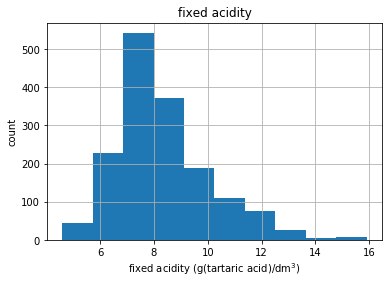

In [44]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


## Importing non-flat files from the web

Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function pd.read_csv(). This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use pd.read_excel() to import an Excel spreadsheet.

The URL of the spreadsheet is

'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

Your job is to use pd.read_excel() to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of pd.read_excel() is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [45]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheetname=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


## Performing HTTP requests in Python using urllib

Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from our teach page, "http://www.datacamp.com/teach/documentation".

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

In [46]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()


<class 'http.client.HTTPResponse'>


## Printing HTTP request results in Python using urllib

You have just packaged and sent a GET request to "http://www.datacamp.com/teach/documentation" and then caught the response. You saw that such a response is a http.client.HTTPResponse object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a http.client.HTTPResponse object has an associated read() method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [47]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()


b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="iJHXotGaVexO50d09aHqIVMRhNNLEGrWZzdgQwNc4hE="></script>\n      <script nonce="iJHXotGaVexO50d09aHqIVMRhNNLEGrWZzdgQwNc4hE=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;edu

## Performing HTTP requests in Python using requests

Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their "http://www.datacamp.com/teach/documentation" page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

In [48]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)


<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="7k2IaIur53wvr0PUnTP1uOw1rkLPL9f7meQyptr3x5M="></script>
      <script nonce="7k2IaIur53wvr0PUnTP1uOw1rkLPL9f7meQyptr3x5M=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;educate_home&quot;,&quot;pl

## Parsing HTML with BeautifulSoup

In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is url = 'https://www.python.org/~guido/'.

In [49]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)


<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publications list
   </a>
   , a
   <a href="bio.html">
    brief bio
   </a>
   , assor

## Turning a webpage into data using BeautifulSoup: getting the text

As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [50]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)


<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page
"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.  I
also have
a G+
profile.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead ref

## Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method find_all().

In [51]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))


<title>Guido's Personal Home Page</title>
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


# Interacting with APIs to import data from the web

## Loading and exploring a JSON

Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. Here, you'll load the JSON 'a_movie.json' into the variable json_data, which will be a dictionary. You'll then explore the JSON contents by printing the key-value pairs of json_data to the shell.

In [52]:
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

FileNotFoundError: [Errno 2] No such file or directory: 'a_movie.json'

## API requests

Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was 'http://www.omdbapi.com/?t=hackers' and had a single argument t=hackers.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: apikey=72bc447a.

In [53]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)


{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"556,761","imdbID":"tt

## JSON–from the web to Python

Wow, congrats! You've just queried your first API programmatically in Python and printed the text of the response to the shell. However, as you know, your response is actually a JSON, so you can do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. That's what you're going to do now!

In [55]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


Response:  False
Error:  Invalid API key!


## Checking out the Wikipedia API

You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here). You'll figure out how to find and extract information from the Wikipedia page for Pizza. What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

The URL that requests the relevant query from the Wikipedia API is

https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza


In [56]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a  wood-fired oven. In formal settings, like a restaurant, pizza is  eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.   
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries. Today it is one of the most popular foods in the world and a common fast food item in Europe and North America, available at  pizzerias (restaurants specializing in pizza),  restaurants offering Me

# Diving deep into the Twitter API 

## API Authentication

The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

In [58]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


## Streaming tweets

Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, MyStreamListener, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here.

Your task is to create the Streamobject and to filter tweets according to particular keywords.

In [61]:
# Initialize Stream listener
l = tweepy.StreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])


## Load and explore your Twitter data

Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

In [63]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


## Twitter data to DataFrame

Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [65]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())


                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


## A little bit of Twitter text analysis

Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

    import re

    def word_in_text(word, text):
        word = word.lower()
        text = tweet.lower()
        match = re.search(word, text)

        if match:
            return True
        return False

You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [66]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


NameError: name 'word_in_text' is not defined

## Plotting your Twitter data

Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:

    a list of labels and
    a list containing the variables you wish to plot (clinton, trump and so on.)

Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

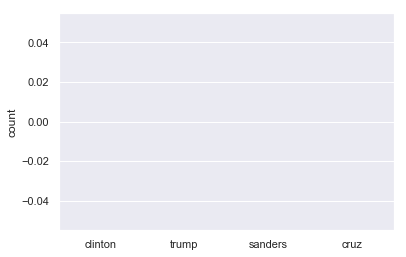

In [67]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()
